In [50]:
from Function import cargar_dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from openpyxl import load_workbook 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [8]:
file_path = '/Users/Usuario/Desktop/prueba_citec/data_set/OnlineRetail.xlsx'
# Cargar el dataset
df = cargar_dataset(file_path)

In [9]:
df['Total'] = df['Quantity'] * df['UnitPrice']

In [10]:
df['CustomerID'] = df['CustomerID'].fillna(1)
df['CustomerID'] = df['CustomerID'].astype(int)
df['CustomerID'] = df['CustomerID'].astype(str)

In [24]:
# Nombre del día, mes, año
df['Dia']  = df['InvoiceDate'].dt.strftime('%A')
df['MesN'] = df['InvoiceDate'].dt.month
df['Mes']  = df['InvoiceDate'].dt.month_name()
df['Año']  = df['InvoiceDate'].dt.year


In [13]:
df = df.drop_duplicates()

# Cohort Analysis

In [18]:
df.groupby('CustomerID')['Total'].sum().reset_index().sort_values(by='Total', ascending=False).head(10)

,CustomerID,Total
0,1,1447487.53
1704,14646,279489.02
4234,18102,256438.49
3759,17450,187322.17
1896,14911,132458.73
56,12415,123725.45
1346,14156,113214.59
3802,17511,88125.38
3203,16684,65892.08
1006,13694,62690.54


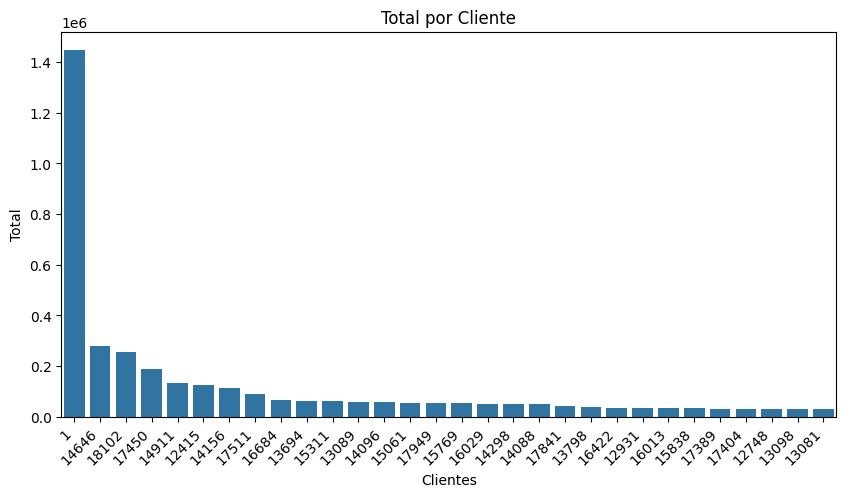

In [11]:
# Mejores clientes
# Agrupar por Cliente y sumar los totales, luego ordenarlos

total_por_pais = df.groupby('CustomerID')['Total'].sum().reset_index().sort_values(by='Total', ascending=False).head(30)

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x='CustomerID', y='Total', data=total_por_pais)

plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Total por Cliente')
plt.xlabel('Clientes')
plt.ylabel('Total')
plt.show()

#la mayoría de los ingresos son desde clientes anónimos, no registrados.
#Sin embargo, tenemos varios clientes importantes

In [14]:
# Top 10 Mayores clientes con países
clientes = df[df['CustomerID'] != '1']
clientes.groupby(['CustomerID', 'Country'])['Total'].sum().reset_index().sort_values(by='Total', ascending=False).head(10)

,CustomerID,Country,Total
1711,14646,Netherlands,279489.02
4241,18102,United Kingdom,256438.49
3766,17450,United Kingdom,187322.17
1903,14911,EIRE,132458.73
57,12415,Australia,123725.45
1353,14156,EIRE,113214.59
3809,17511,United Kingdom,88125.38
3210,16684,United Kingdom,65892.08
1013,13694,United Kingdom,62690.54
2200,15311,United Kingdom,59284.19


In [51]:
#en ele analisis descritivo miramos al detalle el comportamiento de ventas al pasar del tiempo segun años , semeses , semana y dias.
#el el archivo imporntante.txt dejo  resumen de los detalles encontrados.